<a href="https://colab.research.google.com/github/kuanysh279/Web-Dev/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

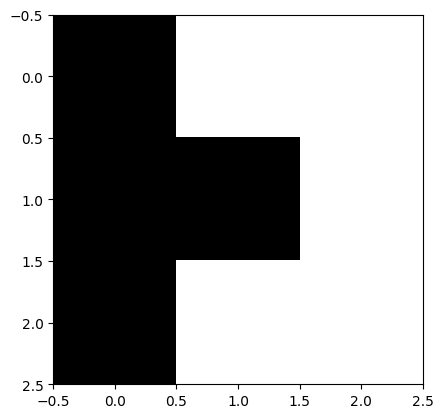

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input data (3x3 pictures, each represented as a flattened 1D array)
input_data = np.array([[0, 1, 1,
                        0, 0, 1,
                        0, 1, 1],
                       [1, 1, 1,
                        1, 1, 1,
                        1, 0, 1],
                       [1, 0, 1,
                        1, 0, 0,
                        1, 0, 1],
                       [1, 1, 1,
                        1, 0, 1,
                        0, 0, 0],
                       [1, 0, 1,
                        0, 0, 0,
                        1, 1, 1],
                       [1, 1, 1,
                        1, 1, 1,
                        0, 0, 1],
                       [1, 1, 1,
                        1, 1, 1,
                        1, 0, 0]])

# Define the target labels (1 for positive, 0 for negative)
target_labels = np.array([[0, 1],
                          [1, 0],
                          [0, 1],
                          [1, 0],
                          [0, 1],
                          [1, 0],
                          [1, 0]])

image_2d = np.reshape(input_data[0], (3, 3))

plt.imshow(image_2d, cmap='gray')
#plt.axis('off')
plt.show()


In [ ]:
# Define the activation function (sigmoid function)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize weights for the hidden layer and output layer randomly
np.random.seed(42)  # for reproducibility
hidden_layer_weights = np.random.rand(9, 4)  # 9 input features, 4 hidden neurons
output_layer_weights = np.random.rand(4, 2)  # 4 hidden neurons, 2 output neurons



In [ ]:
print(hidden_layer_weights)


[[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451]
 [0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378 0.51423444]
 [0.59241457 0.04645041 0.60754485 0.17052412]
 [0.06505159 0.94888554 0.96563203 0.80839735]]


In [ ]:
# Learning rate
learning_rate = 0.1

# Number of training epochs
epochs = 10000

# Training the neural network
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_output = sigmoid(np.dot(input_data, hidden_layer_weights))
    output_layer_output = sigmoid(np.dot(hidden_layer_output, output_layer_weights))

    # Calculate the error (Mean Squared Error)
    error = np.mean((output_layer_output - target_labels) ** 2)

    # Backpropagation
    output_error = output_layer_output - target_labels
    output_delta = output_error * output_layer_output * (1 - output_layer_output)

    hidden_layer_error = output_delta.dot(output_layer_weights.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_output * (1 - hidden_layer_output)

    # Update weights using gradient descent
    output_layer_weights -= learning_rate * hidden_layer_output.T.dot(output_delta)
    hidden_layer_weights -= learning_rate * input_data.T.dot(hidden_layer_delta)

    # Print the error every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}, Error: {error:.4f}')



Epoch: 0, Error: 0.0011
Epoch: 1000, Error: 0.0006
Epoch: 2000, Error: 0.0005
Epoch: 3000, Error: 0.0004
Epoch: 4000, Error: 0.0003
Epoch: 5000, Error: 0.0002
Epoch: 6000, Error: 0.0002
Epoch: 7000, Error: 0.0002
Epoch: 8000, Error: 0.0002
Epoch: 9000, Error: 0.0001


[[0.98801883 0.01190756]]


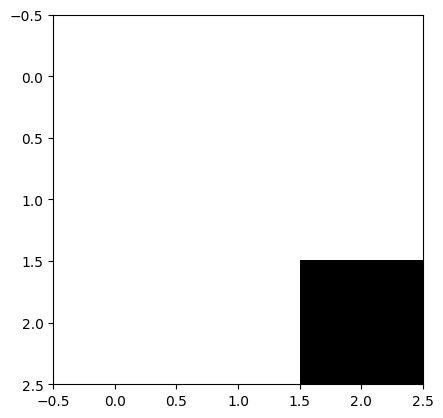

Predicted Label: something on the horizon


In [ ]:
# Testing the neural network with a new input
test_input = np.array([[1, 1, 1,
                        1, 1, 1,
                        1, 1, 0]])
hidden_layer_output = sigmoid(np.dot(test_input, hidden_layer_weights))
#print(hidden_layer_output)
output_layer_output = sigmoid(np.dot(hidden_layer_output, output_layer_weights))
print(output_layer_output)
predicted_label = np.argmax(output_layer_output)
image_2d = np.reshape(test_input, (3, 3))

labels=['something on the horizon', 'undefined']
plt.imshow(image_2d, cmap='gray')
#plt.axis('off')
plt.show()

print(f'Predicted Label: {labels[predicted_label]}')